## Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, precision_recall_curve, average_precision_score, recall_score
from sklearn.decomposition import PCA
%matplotlib inline

## Load dataset from csv file

In [2]:
dataset = pd.read_csv('training_set.csv')
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [3]:
# Dataset contains one unnamed column and it should be removed
dataset = dataset.iloc[:, 1:]
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


## Perform EDA

In [4]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

array([[<AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'X2'}>,
        <AxesSubplot:title={'center':'X3'}>,
        <AxesSubplot:title={'center':'X4'}>,
        <AxesSubplot:title={'center':'X5'}>,
        <AxesSubplot:title={'center':'X6'}>,
        <AxesSubplot:title={'center':'X7'}>,
        <AxesSubplot:title={'center':'X8'}>],
       [<AxesSubplot:title={'center':'X9'}>,
        <AxesSubplot:title={'center':'X10'}>,
        <AxesSubplot:title={'center':'X11'}>,
        <AxesSubplot:title={'center':'X12'}>,
        <AxesSubplot:title={'center':'X13'}>,
        <AxesSubplot:title={'center':'X14'}>,
        <AxesSubplot:title={'center':'X15'}>,
        <AxesSubplot:title={'center':'X16'}>],
       [<AxesSubplot:title={'center':'X17'}>,
        <AxesSubplot:title={'center':'X18'}>,
        <AxesSubplot:title={'center':'X19'}>,
        <AxesSubplot:title={'center':'X20'}>,
        <AxesSubplot:title={'center':'X21'}>,
        <AxesSubplot:title={'center':'X22

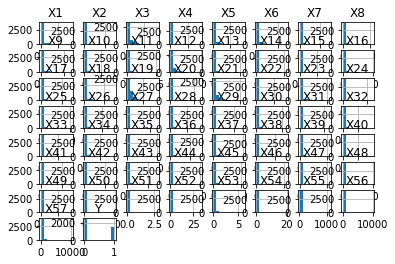

In [6]:
dataset.hist()

In [7]:
corr = dataset.corr()
plt.figure(figsize=(200, 200))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

## Separate features and classes

In [8]:
features = dataset.iloc[:, :-1]
classes = dataset.iloc[:, -1]
# features.columns
features.shape

(3910, 57)

## Feature selection

In [9]:
sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l1', solver='liblinear'))
sel_.fit(features.values, classes.values)
unwanted_features = features.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
unwanted_features

Index(['X11', 'X32', 'X34', 'X51'], dtype='object')

## Remove unwanted features from dataset

In [10]:
refined_features = features.drop(unwanted_features, axis=1, inplace=False)
refined_features.shape

(3910, 53)

## Scaling of data

In [11]:
sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_validate = sc.transform(X_validate)
features_sc = sc.fit_transform(refined_features.values)

## K fold cross validation of model

In [12]:
train_score = []
validation_score = []
k_vals = []
for i in range(0, 20):
    k_vals.append(i)
    X_train, X_validate, y_train, y_validate = train_test_split(features_sc, classes.values, test_size = 0.20, random_state = i)
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    
    tr_score = classifier.score(X_train, y_train)
    train_score.append(tr_score)
    
    val_score = classifier.score(X_validate, y_validate)
    validation_score.append(val_score)
    y_pred = classifier.predict(X_validate)

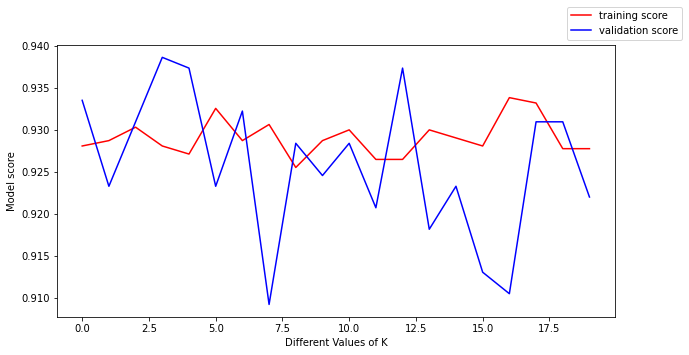

In [13]:

plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, validation_score, color = 'b', label = 'validation score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## Classification performance metrics
1. Accuracy

In [14]:
y_pred = classifier.predict(X_validate)
accuracy_score(y_validate, y_pred)

0.921994884910486

2. Confusion matrix

In [15]:
confusion_matrix = confusion_matrix(y_validate, y_pred)
confusion_matrix


array([[444,  23],
       [ 38, 277]])

3. Precision Recall curve

Average precision score is = 0.8605404403307217
Average Recall score is = 0.8793650793650793


Text(0, 0.5, 'Precision')

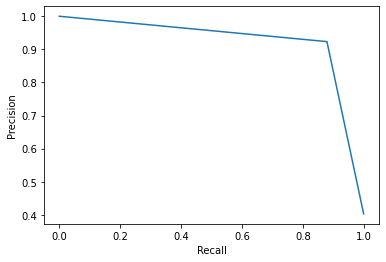

In [16]:
print(f"Average precision score is = {average_precision_score(y_validate, y_pred)}")
print(f"Average Recall score is = {recall_score(y_validate, y_pred)}")
precision, recall, thresholds = precision_recall_curve(y_validate, y_pred)
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel("Recall")
plt.ylabel("Precision")

4. Receiver Operating Characteristic curve (ROC)

Text(0, 0.5, 'TPR')

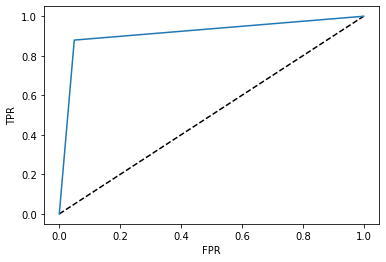

In [17]:
fpr, tpr, threshold = roc_curve(y_validate, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("FPR")
plt.ylabel("TPR")

## Prediction on test dataset

In [18]:
test_dataset = pd.read_csv('test_set.csv')
test_features = test_dataset.iloc[:, 1:]
test_features.shape

(691, 57)

In [19]:
refined_test_features = test_features.drop(unwanted_features, axis=1, inplace=False)
refined_test_features.shape

test_features_sc = sc.fit_transform(refined_test_features.values)

y_predicted = classifier.predict(test_features_sc)
# y_predicted
test_dataset["Y"] = y_predicted
test_dataset.to_csv("output.csv")
print(test_dataset.head())

   Unnamed: 0    X1   X2    X3   X4    X5    X6    X7    X8    X9  ...  X49  \
0           0  0.70  0.0  0.70  0.0  0.00  0.00  0.00  0.00  0.00  ...  0.0   
1           1  0.00  0.0  0.84  0.0  0.84  0.00  0.84  0.00  0.00  ...  0.0   
2           2  0.46  0.3  0.46  0.0  0.05  0.12  0.05  0.28  0.43  ...  0.0   
3           3  0.10  0.2  1.01  0.0  0.80  0.80  0.50  0.00  0.80  ...  0.0   
4           4  0.00  0.0  0.72  0.0  0.72  0.00  0.72  0.00  0.00  ...  0.0   

     X50  X51    X52    X53    X54     X55  X56   X57  Y  
0  0.000  0.0  0.105  0.000  0.000   2.342   47    89  0  
1  0.388  0.0  0.776  0.129  0.000  10.375  168   249  1  
2  0.065  0.0  0.325  0.756  0.153   5.891  193  3040  1  
3  0.110  0.0  0.490  0.158  0.015   8.550  669  1351  1  
4  0.364  0.0  0.729  0.121  0.000   7.781   32   249  1  

[5 rows x 59 columns]
